In [295]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
import sklearn
plt.rcParams["figure.figsize"] = (18,9)

In [296]:
df = pd.read_csv('train.csv')

In [297]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


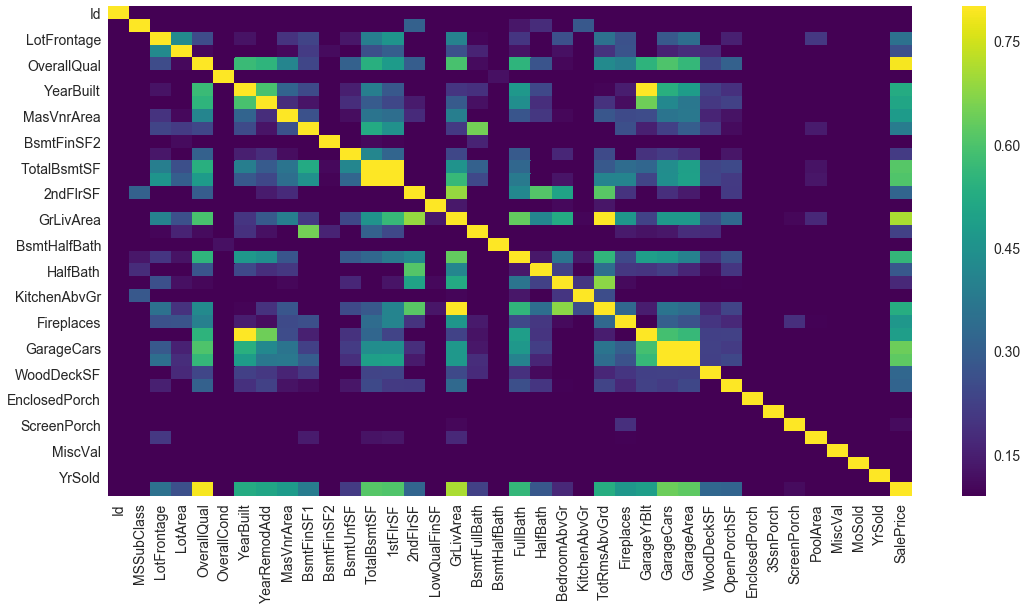

In [298]:
sns.heatmap(df.corr(), cmap='viridis', vmax=0.8, vmin=0.09)

In [299]:
cols = ['SalePrice','LotFrontage','OverallQual','YearBuilt','GrLivArea','FullBath','GarageCars','YearRemodAdd','MasVnrArea','BsmtFinSF1','TotalBsmtSF','1stFlrSF','WoodDeckSF','OpenPorchSF']

In [300]:
data = df[cols]

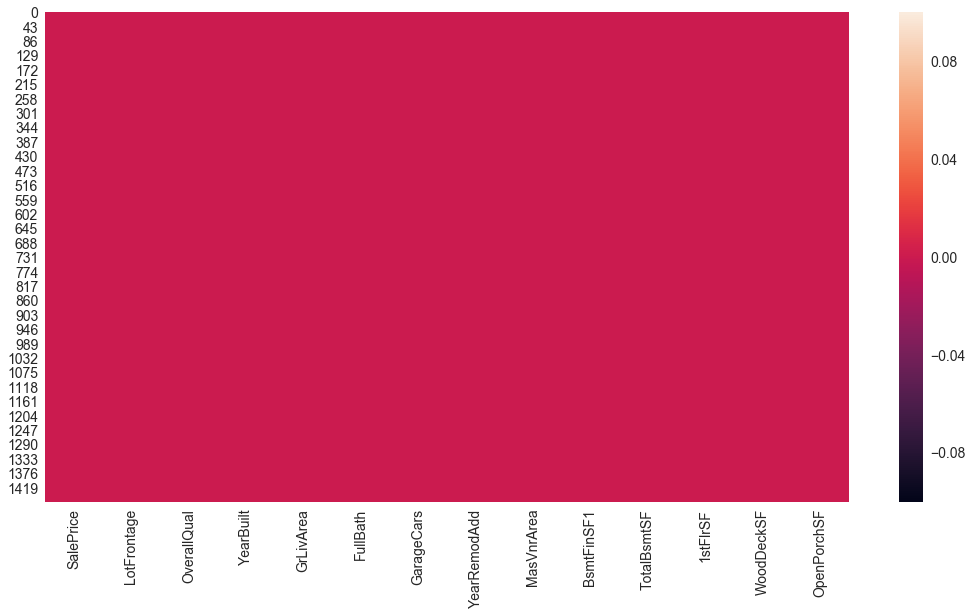

In [311]:
sns.heatmap(data.isnull())

In [309]:
data.fillna(value=0 , inplace=True)

/Users/shazmohammad/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:2852: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [312]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [321]:
X= data.drop('SalePrice' ,axis=1)
y= data['SalePrice']

In [322]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [323]:
rfr = RandomForestRegressor(n_estimators=100, max_depth=10, max_features=4)

In [324]:
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features=4, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [328]:
print "Train Score {}".format(rfr.score(X_train,y_train))
print "Test Score {}".format(rfr.score(X_test,y_test))

Train Score 0.967786390132
Test Score 0.855619372342


In [345]:
test_df = pd.read_csv('test.csv')

In [346]:
trcols = ['LotFrontage','OverallQual','YearBuilt','GrLivArea','FullBath','GarageCars','YearRemodAdd','MasVnrArea','BsmtFinSF1','TotalBsmtSF','1stFlrSF','WoodDeckSF','OpenPorchSF']
t_df = test_df[trcols]

In [347]:
t_df.head()

,LotFrontage,OverallQual,YearBuilt,GrLivArea,FullBath,GarageCars,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,WoodDeckSF,OpenPorchSF
0,80.0,5,1961,896,1,1.0,1961,0.0,468.0,882.0,896,140,0
1,81.0,6,1958,1329,1,1.0,1958,108.0,923.0,1329.0,1329,393,36
2,74.0,5,1997,1629,2,2.0,1998,0.0,791.0,928.0,928,212,34
3,78.0,6,1998,1604,2,2.0,1998,20.0,602.0,926.0,926,360,36
4,43.0,8,1992,1280,2,2.0,1992,0.0,263.0,1280.0,1280,0,82


In [352]:
t_df.fillna(value=0, inplace=True)

In [355]:
pred = rfr.predict(t_df)

In [356]:
sub = pd.DataFrame()
sub['Id'] = test_df['Id']
sub['SalePrice'] = pred
sub.to_csv('submission.csv',index=False)